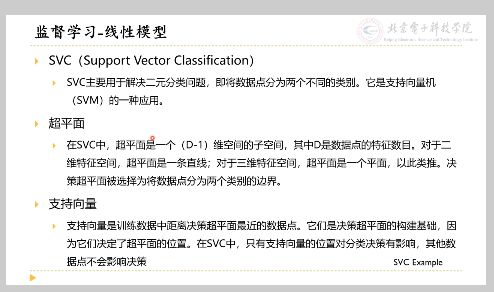

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

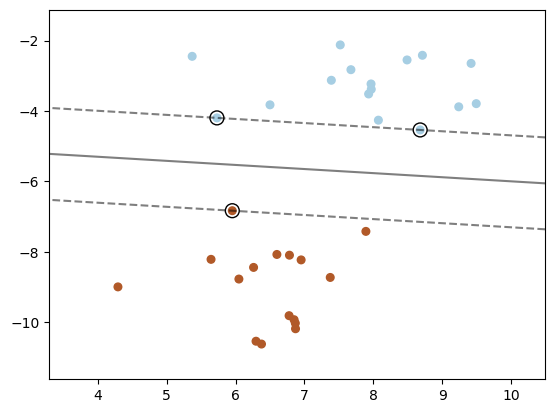

训练集分类精度：100.00%
测试集分类精度：100.00%
最优参数： {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
最佳得分： 1.0


In [3]:
# 创建40 个可分离的数据点
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 SVM 模型，不进行正则化，C=1000
clf = svm.SVC(kernel='linear', C=1000)

# 训练模型
clf.fit(X_train, y_train)

# 绘制数据点
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# 绘制决策边界
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1,0,1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)

# 绘制支持向量
ax.scatter(
    clf.support_vectors_[:, 0], 
    clf.support_vectors_[:, 1], 
    s=100, 
    linewidth=1, 
    facecolors='none', 
    edgecolors='k')

# 显示图形
plt.show()

# 预测训练集和测试集
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


# 计算并打印训练集和测试集的分类精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("训练集分类精度：{:.2f}%".format(train_accuracy * 100))
print("测试集分类精度：{:.2f}%".format(test_accuracy * 100))

# 网络搜索参数
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'rbf','poly','sigmoid'],
              'gamma': [0.001, 0.01, 0.1, 1,  'scale', 'auto'],}

# 创建 SVM 模型，使用网格搜索法搜索最优参数
svc = svm.SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

# 打印最优参数
print("最优参数：", grid_search.best_params_)
print("最佳得分：" , grid_search.best_score_)





